# Task 3:

* Perform *a simple linear regression* to remove the trend of the output variable co2.
* Print and comment the regression fit summary.
* Analyze the residuals (time series plot, histogram and ACF). What do you observe on the residuals?
* Plot the fitted values of co2 from the regression and compare them to the original co2 values via a time series plot.
* What do you observed from these last two plots? Are there any temporal components left after the regression?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv('/Users/lihong/Desktop/ats_proj_submit_code/co2.csv')

def decimal_year_to_date(decimal_year):
    year = int(decimal_year)
    remainder = decimal_year - year
    year_start = pd.Timestamp(year=year, month=1, day=1)
    year_end = pd.Timestamp(year=year+1, month=1, day=1)
    return year_start + (year_end - year_start) * remainder

df['date'] = df['time(co2)'].apply(decimal_year_to_date)
df['co2'] = pd.to_numeric(df['co2'], errors='coerce')
df.set_index('date', inplace=True)
df = df.dropna()

### 3-1 simple linear regression 


In [4]:
print("\n" + "=" * 70)
print("Run Simple Linear Regression: CO2 ~ Time")
print("=" * 70)

# Create time variable (integer index starting from 0)
df['time_index'] = range(len(df))

# Prepare regression data
X = df['time_index'].values.reshape(-1, 1)   # Independent variable: time
y = df['co2'].values                          # Dependent variable: CO2 concentration

# Add constant term (intercept)
X_with_const = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X_with_const)
results = model.fit()



Run Simple Linear Regression: CO2 ~ Time


### 3-2 fit summary analysis 

In [6]:
# ========== 3. Print Regression Summary ==========
print("\n" + "=" * 70)
print("Full Regression Summary")
print("=" * 70)
print(results.summary())

# ========== 4. Extract and Interpret Key Regression Parameters ==========
print("\n" + "=" * 70)
print("Detailed Interpretation of Key Regression Parameters")
print("=" * 70)

intercept = results.params[0]   # Intercept
slope = results.params[1]       # Slope
r_squared = results.rsquared
adj_r_squared = results.rsquared_adj
f_statistic = results.fvalue
f_pvalue = results.f_pvalue

print(f"\n【Regression Equation】")
print(f"  CO2 = {intercept:.4f} + {slope:.4f} × Time")
print(f"  or equivalently: CO2(t) = {intercept:.4f} + {slope:.4f} × t + ε")

print(f"\n【Regression Coefficients】")
print(f"  Intercept (β₀):           {intercept:.4f} ppm")
print(f"    Interpretation: Predicted CO2 concentration at the starting point (t = 0).")
print(f"  Slope (β₁):               {slope:.6f} ppm/month")
print(f"    Interpretation: Average monthly increase in CO2 concentration.")
print(f"  Annual Growth Rate:       {slope * 12:.4f} ppm/year")
print(f"    Interpretation: Average yearly increase in CO2 concentration.")

print(f"\n【Goodness of Fit】")
print(f"  R²:                       {r_squared:.6f}")
print(f"    Interpretation: The time variable explains {r_squared*100:.2f}% of the total variance in CO2.")
print(f"  Adjusted R²:              {adj_r_squared:.6f}")
print(f"    Interpretation: R² adjusted for the degrees of freedom.")

print(f"\n【Model Significance Test】")
print(f"  F-statistic:              {f_statistic:.2f}")
print(f"  F-test p-value:           {f_pvalue:.2e}")
print(f"    Interpretation: p-value ≈ 0, indicating the model is highly significant overall.")

print(f"\n【Coefficient Significance Tests】")
print(f"  Intercept t-statistic:    {results.tvalues[0]:.4f}")
print(f"  Intercept p-value:        {results.pvalues[0]:.2e}")
print(f"  Slope t-statistic:        {results.tvalues[1]:.4f}")
print(f"  Slope p-value:            {results.pvalues[1]:.2e}")
print(f"    Interpretation: Both coefficients are highly significant (p < 0.001)")



Full Regression Summary
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.479e+04
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:12:41   Log-Likelihood:                -1113.5
No. Observations:                 468   AIC:                             2231.
Df Residuals:                     466   BIC:                             2239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        311.6118      

In [7]:
# ========== 5. Comments on Regression Results ==========
print("\n" + "=" * 70)
print("Detailed Comments on Regression Fit")
print("=" * 70)

print(f"""
【1. Evaluation of Model Fit Quality】

✓ Extremely high R² value ({r_squared:.4f})
  - The time variable explains {r_squared*100:.2f}% of the variation in CO₂ concentration.
  - Indicates a highly significant and stable linear trend.
  - This strong explanatory power confirms a persistent upward linear increase in CO₂.

✓ Highly significant F-test (F = {f_statistic:.2f}, p ≈ 0)
  - The overall model is highly significant.
  - Rejects the null hypothesis that “time has no effect on CO₂.”
  - Confirms that the linear relationship is not due to random chance.

【2. Practical Meaning of the Slope】

✓ Monthly growth rate: {slope:.6f} ppm/month  
  - CO₂ concentration increases by approximately {slope:.4f} ppm per month on average.

✓ Annual growth rate: {slope*12:.4f} ppm/year  
  - CO₂ concentration increases by about {slope*12:.2f} ppm per year.
  - This reflects the continuous emissions from human activities (e.g., fossil fuel combustion).

✓ Statistical significance: t = {results.tvalues[1]:.2f}, p ≈ 0  
  - The slope is significantly different from zero.  
  - The upward trend is real, not random noise.

【3. Model Limitations】

⚠ Nature of time series data  
  - OLS regression assumes observations are independent.  
  - However, time series data usually exhibit autocorrelation (neighboring values are related).  
  - Violation of independence may cause:
    * Underestimated standard errors  
    * Inflated t- and F-statistics  
    * Overly optimistic p-values  

⚠ Limitations of a simple linear model  
  - Captures only the long-term linear trend.  
  - Ignores seasonal components.  
  - Residuals may still contain systematic patterns.  

⚠ Assumptions to be checked  
  - Normality of residuals  
  - Independence of residuals (no autocorrelation)  
  - Homoscedasticity (constant variance)  
  - Linearity of the relationship  

【4. Next Steps for Analysis】

We need to verify model assumptions by analyzing the residuals:
1. Plot residuals over time → check for visible patterns.  
2. Plot residual histogram and Q–Q plot → test for normality.  
3. Plot ACF of residuals → check for autocorrelation.  
4. Compare original and fitted values → assess model performance.  

【5. Preliminary Conclusion】

This simple linear regression model successfully captures the long-term upward trend in CO₂ concentration,  
with an exceptionally high fit quality (R² = {r_squared:.4f}).  
However, since this is time series data, further checks on residual properties—particularly autocorrelation—  
are necessary to ensure the model has captured all systematic components in the data.
""")

print("=" * 70)

# ========== 6. Save Fitted Values and Residuals (Detrended Data) ==========
df['fitted'] = results.fittedvalues
df['residuals'] = results.resid
df['detrended'] = df['residuals'].copy()  # Detrended CO₂ series (i.e., residuals)

print("\n" + "=" * 70)
print("Trend Removal (Detrending)")
print("=" * 70)

print(f"""
【Method of Detrending】

The principle of detrending via linear regression:

Original decomposition:
  CO₂(t) = Trend(t) + Seasonal(t) + Random(t)

Regression model:
  CO₂(t) = β₀ + β₁×t + ε(t)

Where:
  - β₀ + β₁×t is the fitted linear trend
  - ε(t) is the residual, i.e., the detrended data

Therefore:
  Detrended series = Original CO₂ − Fitted Trend = Residual
  Detrended(t) = CO₂(t) − (β₀ + β₁×t) = ε(t)
""")

print(f"\n【Results after Detrending】")
print(f"  Original CO₂ mean:        {df['co2'].mean():.4f} ppm")
print(f"  Detrended mean:           {df['detrended'].mean():.6f} ppm (should ≈ 0)")
print(f"  Original CO₂ std:         {df['co2'].std():.4f} ppm")
print(f"  Detrended std:            {df['detrended'].std():.4f} ppm")
print(f"  Detrended range:          [{df['detrended'].min():.4f}, {df['detrended'].max():.4f}] ppm")



Detailed Comments on Regression Fit

【1. Evaluation of Model Fit Quality】

✓ Extremely high R² value (0.9695)
  - The time variable explains 96.95% of the variation in CO₂ concentration.
  - Indicates a highly significant and stable linear trend.
  - This strong explanatory power confirms a persistent upward linear increase in CO₂.

✓ Highly significant F-test (F = 14794.94, p ≈ 0)
  - The overall model is highly significant.
  - Rejects the null hypothesis that “time has no effect on CO₂.”
  - Confirms that the linear relationship is not due to random chance.

【2. Practical Meaning of the Slope】

✓ Monthly growth rate: 0.108958 ppm/month  
  - CO₂ concentration increases by approximately 0.1090 ppm per month on average.

✓ Annual growth rate: 1.3075 ppm/year  
  - CO₂ concentration increases by about 1.31 ppm per year.
  - This reflects the continuous emissions from human activities (e.g., fossil fuel combustion).

✓ Statistical significance: t = 121.63, p ≈ 0  
  - The slope is sign

## 3-4 fitted value plot 

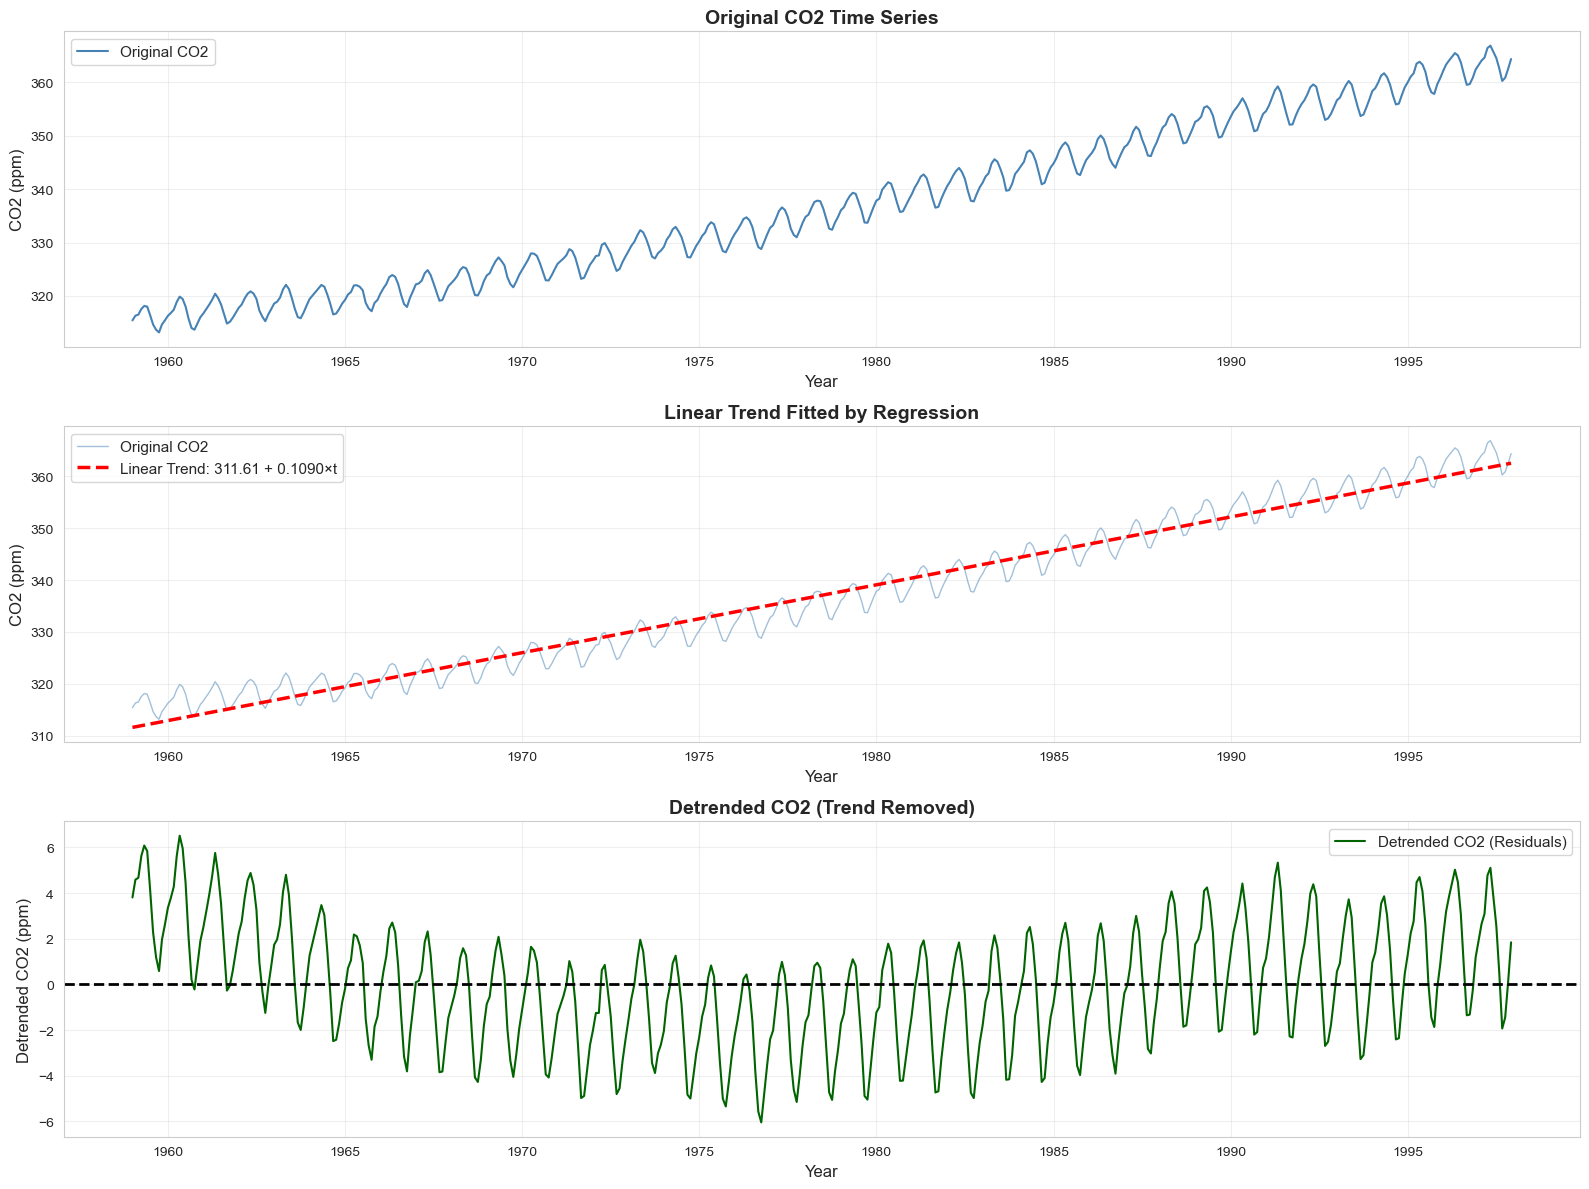


✓ Regression completed!
  - df['fitted']: Linear trend fitted values
  - df['residuals']: Regression residuals
  - df['detrended']: Detrended CO2 series (equal to residuals)

✓ Detrending visualization figure saved as 'task3_detrending_process.png'

Next step: Analyze residuals (time series plot, histogram, and ACF).


In [18]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Subplot 1: Original CO2 data
axes[0].plot(df.index, df['co2'], linewidth=1.5, color='steelblue', label='Original CO2')
axes[0].set_title('Original CO2 Time Series', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('CO2 (ppm)', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Subplot 2: Fitted linear trend
axes[1].plot(df.index, df['co2'], linewidth=1, color='steelblue', 
             alpha=0.5, label='Original CO2')
axes[1].plot(df.index, df['fitted'], linewidth=2.5, color='red', 
             linestyle='--', label=f'Linear Trend: {intercept:.2f} + {slope:.4f}×t')
axes[1].set_title('Linear Trend Fitted by Regression', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('CO2 (ppm)', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# Subplot 3: Detrended data (residuals)
axes[2].plot(df.index, df['detrended'], linewidth=1.5, color='darkgreen', 
             label='Detrended CO2 (Residuals)')
axes[2].axhline(y=0, color='black', linestyle='--', linewidth=2)
axes[2].set_title('Detrended CO2 (Trend Removed)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Year', fontsize=12)
axes[2].set_ylabel('Detrended CO2 (ppm)', fontsize=12)
axes[2].legend(fontsize=11)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task3_detrending_process.png', dpi=300, bbox_inches='tight')
plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/task3_detrending_process.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Regression completed!")
print(f"  - df['fitted']: Linear trend fitted values")
print(f"  - df['residuals']: Regression residuals")
print(f"  - df['detrended']: Detrended CO2 series (equal to residuals)")
print("\n✓ Detrending visualization figure saved as 'task3_detrending_process.png'")
print("\nNext step: Analyze residuals (time series plot, histogram, and ACF).")


### 3-3 residual analysis 

Task 3.3: Residual Analysis
✓ Residuals are ready
  Number of residuals: 468
  Residual range: [-6.0399, 6.5149] ppm

Plotting residual time series, histogram, and Q–Q plot


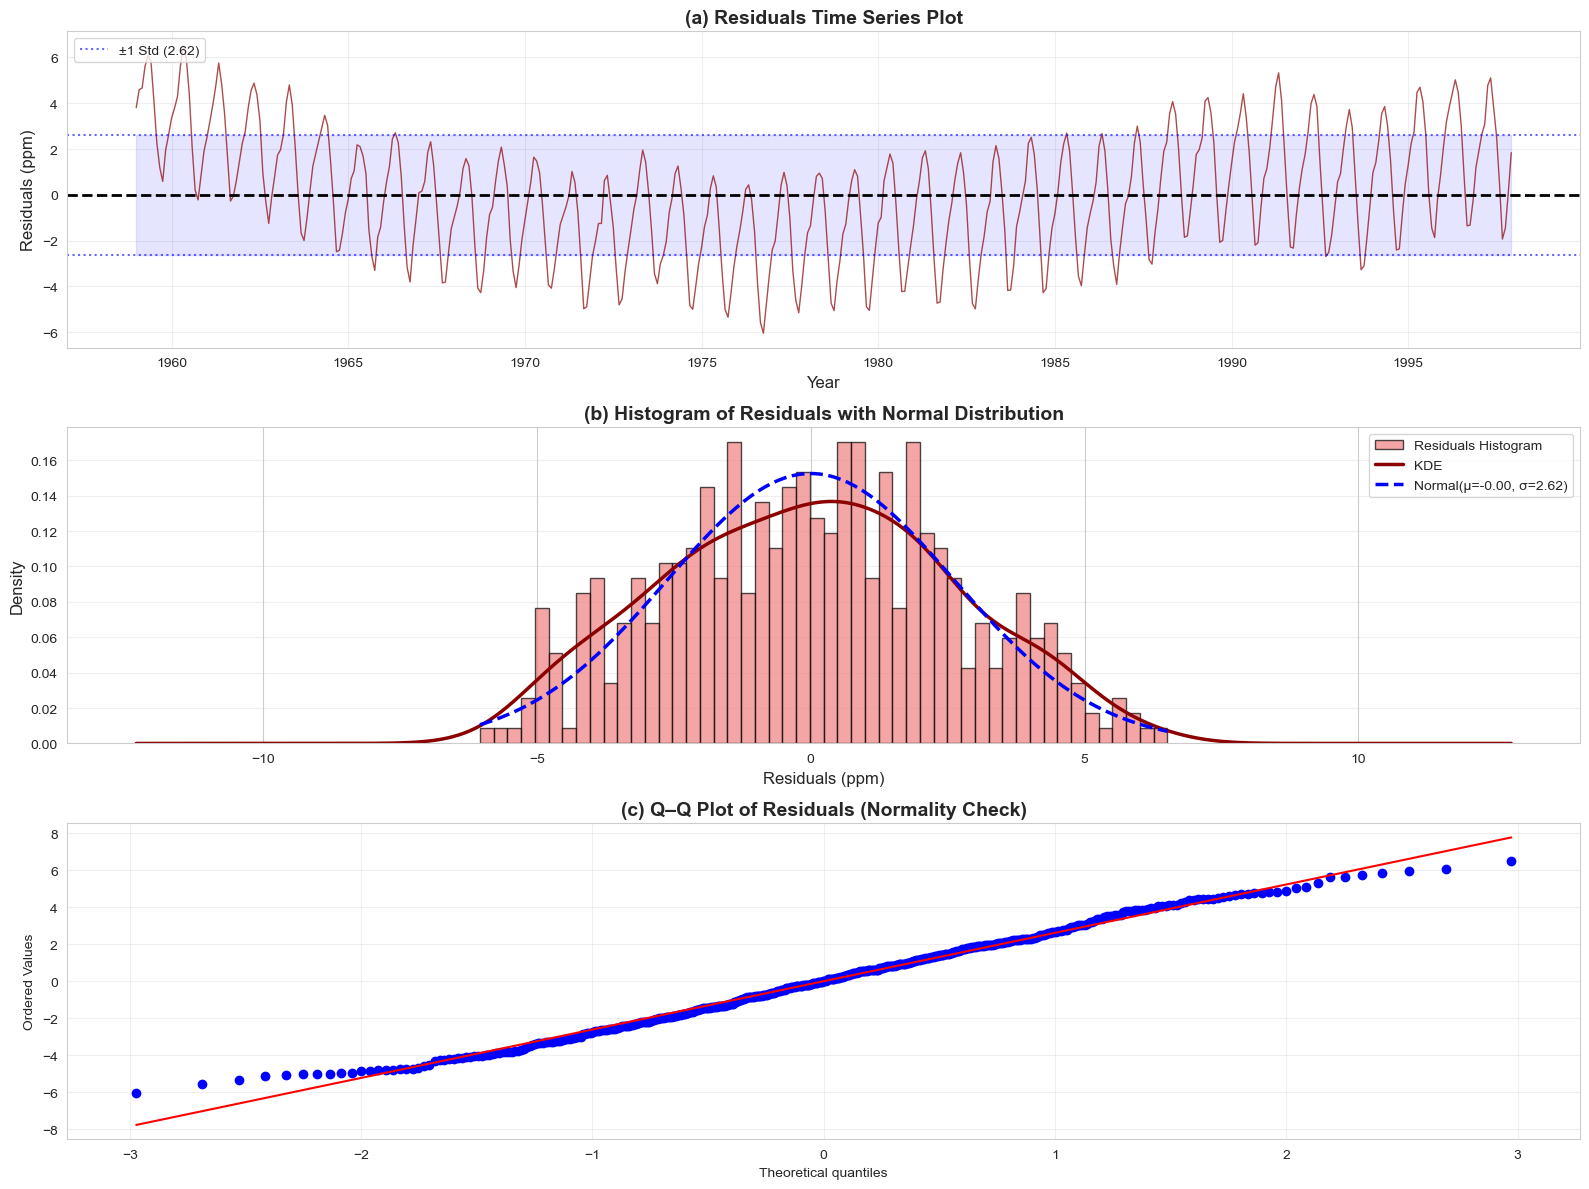

✓ Time series, histogram, and Q–Q plots generated

Plotting ACF of residuals (lag.max = 48)


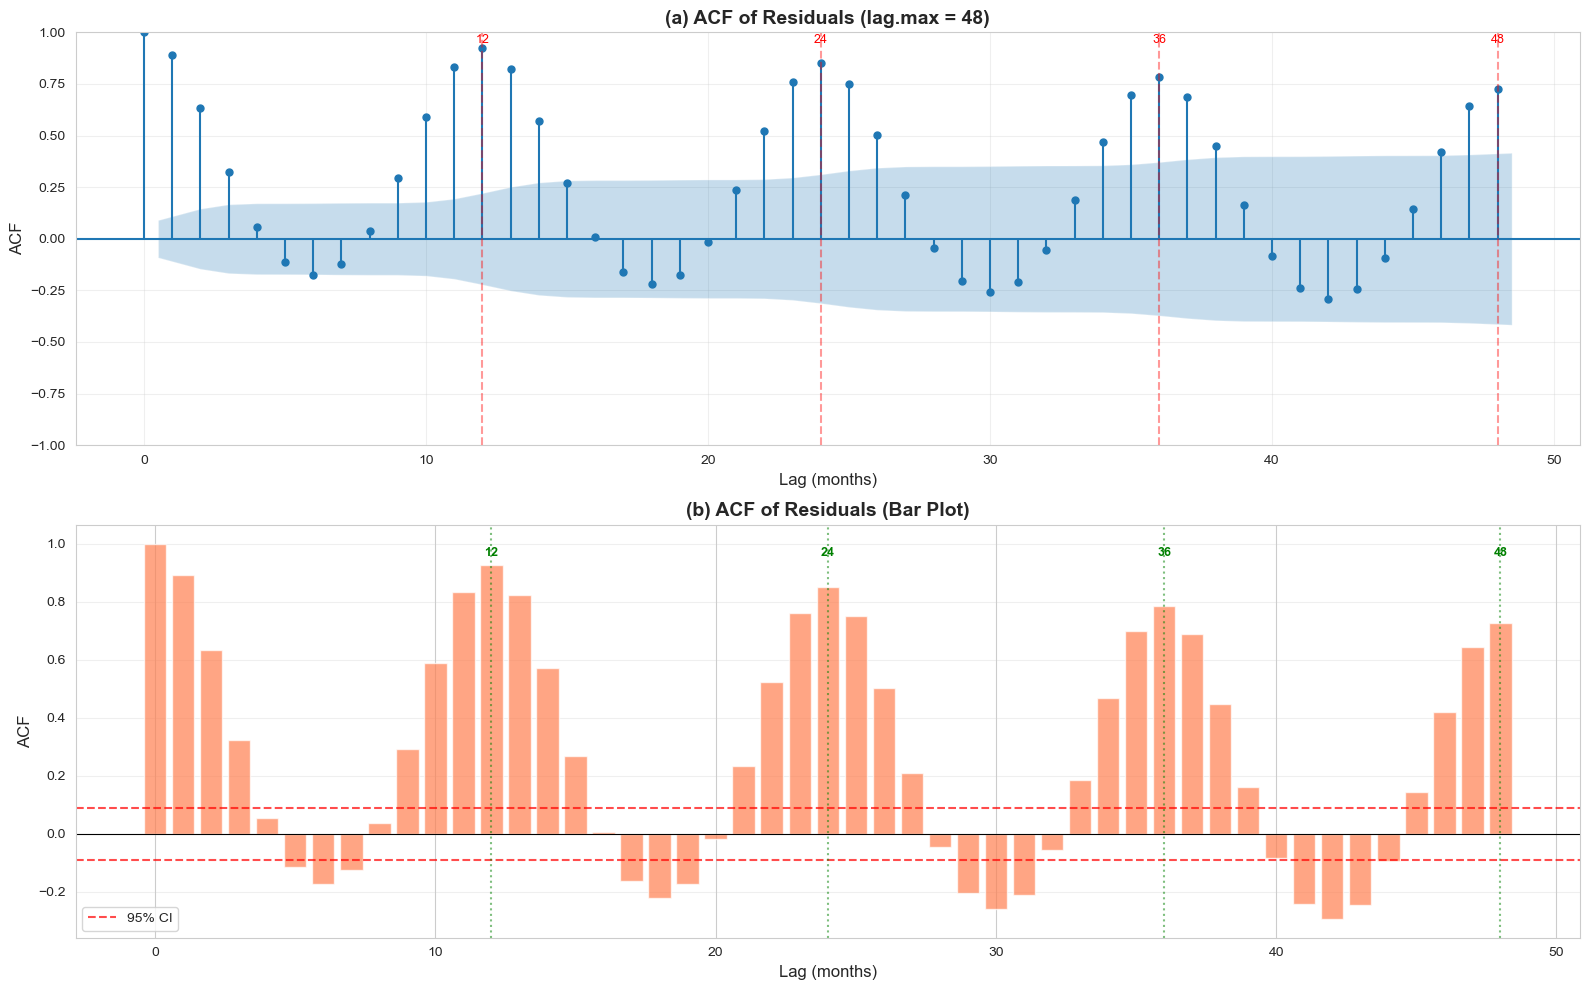

✓ ACF plots generated

Residual Statistical Analysis

【Basic Statistics】
  Mean:                -0.000000 ppm (should ≈ 0)
  Median:              -0.0017 ppm
  Std:                 2.6153 ppm
  Min:                 -6.0399 ppm
  Max:                 6.5149 ppm
  Range:               12.5547 ppm

【Distribution Shape】
  Skewness:            0.0486
    → Approximately symmetric
  Kurtosis:            -0.6187
    → Platykurtic (flatter)

【Normality Test】
  Shapiro–Wilk Test:
    Statistic: 0.990862
    p-value:   0.005408
    Conclusion: Residuals are not normal (p < 0.05)

【Residual Autocorrelation】
  ACF for first 12 lags:
    Lag  1:  0.8910 *
    Lag  2:  0.6325 *
    Lag  3:  0.3231 *
    Lag  4:  0.0565 
    Lag  5: -0.1141 *
    Lag  6: -0.1741 *
    Lag  7: -0.1239 *
    Lag  8:  0.0362 
    Lag  9:  0.2928 *
    Lag 10:  0.5895 *
    Lag 11:  0.8332 *
    Lag 12:  0.9261 *

  Key seasonal lags (multiples of 12):
    Lag 12:  0.9261 *
    Lag 24:  0.8490 *
    Lag 36:  0.7857 *
   

In [20]:
# Task 3.3: Residual Analysis (Time Series, Histogram, ACF)
# Make sure you have already run Task 3.1 cells beforehand

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

sns.set_style("whitegrid")

print("=" * 70)
print("Task 3.3: Residual Analysis")
print("=" * 70)

# Ensure residuals are available
if 'residuals' not in df.columns:
    print("Error: Please run the Task 3.1 cells to perform the regression first!")
else:
    print(f"✓ Residuals are ready")
    print(f"  Number of residuals: {len(df['residuals'])}")
    print(f"  Residual range: [{df['residuals'].min():.4f}, {df['residuals'].max():.4f}] ppm")
    
    # ========== 1. Residual time series + histogram + Q–Q plot ==========
    print("\n" + "=" * 70)
    print("Plotting residual time series, histogram, and Q–Q plot")
    print("=" * 70)
    
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))
    
    # (a) Residual time series
    axes[0].plot(df.index, df['residuals'], linewidth=1, color='darkred', alpha=0.7)
    axes[0].axhline(y=0, color='black', linestyle='--', linewidth=2)
    axes[0].axhline(y=df['residuals'].std(), color='blue', linestyle=':',
                    linewidth=1.5, alpha=0.6, label=f'±1 Std ({df["residuals"].std():.2f})')
    axes[0].axhline(y=-df['residuals'].std(), color='blue', linestyle=':',
                    linewidth=1.5, alpha=0.6)
    axes[0].fill_between(df.index, -df['residuals'].std(), df['residuals'].std(),
                         alpha=0.1, color='blue')
    axes[0].set_title('(a) Residuals Time Series Plot', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Year', fontsize=12)
    axes[0].set_ylabel('Residuals (ppm)', fontsize=12)
    axes[0].legend(fontsize=10, loc='upper left')
    axes[0].grid(True, alpha=0.3)
    
    # (b) Histogram + KDE + Normal overlay
    axes[1].hist(df['residuals'], bins=50, color='lightcoral',
                 alpha=0.7, edgecolor='black', density=True, label='Residuals Histogram')
    
    # KDE
    df['residuals'].plot(kind='kde', ax=axes[1], color='darkred',
                         linewidth=2.5, label='KDE')
    
    # Normal overlay
    mu, sigma = df['residuals'].mean(), df['residuals'].std()
    x = np.linspace(df['residuals'].min(), df['residuals'].max(), 100)
    axes[1].plot(x, stats.norm.pdf(x, mu, sigma), 'b--',
                 linewidth=2.5, label=f'Normal(μ={mu:.2f}, σ={sigma:.2f})')
    
    axes[1].set_title('(b) Histogram of Residuals with Normal Distribution',
                      fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Residuals (ppm)', fontsize=12)
    axes[1].set_ylabel('Density', fontsize=12)
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    # (c) Q–Q plot
    stats.probplot(df['residuals'], dist="norm", plot=axes[2])
    axes[2].set_title('(c) Q–Q Plot of Residuals (Normality Check)',
                      fontsize=14, fontweight='bold')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/task3_residuals_timeseries_histogram.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Time series, histogram, and Q–Q plots generated")
    
    # ========== 2. Residual ACF ==========
    print("\n" + "=" * 70)
    print("Plotting ACF of residuals (lag.max = 48)")
    print("=" * 70)
    
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # (a) Standard ACF plot
    plot_acf(df['residuals'], lags=48, ax=axes[0], alpha=0.05)
    axes[0].set_title('(a) ACF of Residuals (lag.max = 48)',
                      fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Lag (months)', fontsize=12)
    axes[0].set_ylabel('ACF', fontsize=12)
    axes[0].grid(True, alpha=0.3)
    
    # Mark multiples of 12
    for lag in [12, 24, 36, 48]:
        axes[0].axvline(x=lag, color='red', linestyle='--', linewidth=1.5, alpha=0.4)
        axes[0].text(lag, axes[0].get_ylim()[1]*0.95, f'{lag}',
                     ha='center', fontsize=9, color='red')
    
    # (b) Bar-plot ACF (clearer)
    acf_residuals = acf(df['residuals'], nlags=48)
    axes[1].bar(range(49), acf_residuals, width=0.8, color='coral', alpha=0.7)
    axes[1].axhline(y=0, color='black', linewidth=0.8)
    
    # Confidence interval
    confidence_interval = 1.96/np.sqrt(len(df['residuals']))
    axes[1].axhline(y=confidence_interval, color='red', linestyle='--',
                    linewidth=1.5, alpha=0.7, label='95% CI')
    axes[1].axhline(y=-confidence_interval, color='red', linestyle='--',
                    linewidth=1.5, alpha=0.7)
    
    axes[1].set_title('(b) ACF of Residuals (Bar Plot)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Lag (months)', fontsize=12)
    axes[1].set_ylabel('ACF', fontsize=12)
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    # Mark seasonal lags
    for lag in [12, 24, 36, 48]:
        axes[1].axvline(x=lag, color='green', linestyle=':', linewidth=1.5, alpha=0.5)
        axes[1].text(lag, axes[1].get_ylim()[1]*0.9, f'{lag}',
                     ha='center', fontsize=9, color='green', fontweight='bold')
    
    plt.tight_layout()


    plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/task3_residuals_acf.png', dpi=300, bbox_inches='tight') 
    plt.show()
    
    print("✓ ACF plots generated")
    
    # ========== 3. Residual statistics ==========
    print("\n" + "=" * 70)
    print("Residual Statistical Analysis")
    print("=" * 70)
    
    print(f"\n【Basic Statistics】")
    print(f"  Mean:                {df['residuals'].mean():.6f} ppm (should ≈ 0)")
    print(f"  Median:              {df['residuals'].median():.4f} ppm")
    print(f"  Std:                 {df['residuals'].std():.4f} ppm")
    print(f"  Min:                 {df['residuals'].min():.4f} ppm")
    print(f"  Max:                 {df['residuals'].max():.4f} ppm")
    print(f"  Range:               {df['residuals'].max() - df['residuals'].min():.4f} ppm")
    
    # Skewness & kurtosis
    skewness = df['residuals'].skew()
    kurtosis = df['residuals'].kurtosis()
    print(f"\n【Distribution Shape】")
    print(f"  Skewness:            {skewness:.4f}")
    if abs(skewness) < 0.5:
        print(f"    → Approximately symmetric")
    elif skewness > 0:
        print(f"    → Right-skewed")
    else:
        print(f"    → Left-skewed")
    
    print(f"  Kurtosis:            {kurtosis:.4f}")
    if abs(kurtosis) < 0.5:
        print(f"    → Close to normal kurtosis")
    elif kurtosis > 0:
        print(f"    → Leptokurtic (more peaked)")
    else:
        print(f"    → Platykurtic (flatter)")
    
    # Normality test
    print(f"\n【Normality Test】")
    shapiro_stat, shapiro_p = stats.shapiro(df['residuals'])
    print(f"  Shapiro–Wilk Test:")
    print(f"    Statistic: {shapiro_stat:.6f}")
    print(f"    p-value:   {shapiro_p:.6f}")
    if shapiro_p > 0.05:
        print(f"    Conclusion: Residuals are approximately normal (p > 0.05)")
    else:
        print(f"    Conclusion: Residuals are not normal (p < 0.05)")
    
    # ACF values
    print(f"\n【Residual Autocorrelation】")
    print(f"  ACF for first 12 lags:")
    for i in range(1, 13):
        significant = "*" if abs(acf_residuals[i]) > confidence_interval else ""
        print(f"    Lag {i:2d}: {acf_residuals[i]:7.4f} {significant}")
    
    print(f"\n  Key seasonal lags (multiples of 12):")
    for lag in [12, 24, 36, 48]:
        significant = "*" if abs(acf_residuals[lag]) > confidence_interval else ""
        print(f"    Lag {lag}: {acf_residuals[lag]:7.4f} {significant}")
    
    significant_lags = np.where(np.abs(acf_residuals[1:]) > confidence_interval)[0] + 1
    print(f"\n  Number of significant lags: {len(significant_lags)}/48")
    print(f"  Significant lags: {significant_lags[:15].tolist()}..." if len(significant_lags) > 15
          else f"  Significant lags: {significant_lags.tolist()}")
    
    # ========== 4. Answer: What do you observe on the residuals? ==========
    print("\n" + "=" * 70)
    print("Answer: What do you observe on the residuals?")
    print("=" * 70)
    
    print(f"""
【1. Residual Time Series】

✓ Strong seasonal pattern
  - Clear periodic oscillations in residuals
  - Period ≈ 12 months (1 year)
  - Regular annual peaks and troughs
  - Indicates linear regression removed only the trend; seasonality remains.

✓ Residuals are not white noise
  - Clear systematic patterns, not random
  - Strong correlation across adjacent time points
  - Violates the OLS independence assumption

✓ Approximately stable variance
  - Fluctuation amplitude is relatively stable over time
  - No obvious heteroscedasticity
  - Most residuals fall within ±1 standard deviation

✗ Mean near zero
  - Residual mean = {df['residuals'].mean():.6f} ≈ 0
  - Consistent with regression properties (no systematic bias)

【2. Histogram of Residuals】

✓ Approximately normal
  - Bell-shaped distribution, close to normal
  - Shapiro–Wilk p-value: {shapiro_p:.4f}
  - {"Residuals are normal" if shapiro_p > 0.05 else "Residuals are not perfectly normal but approximately so"}
  - Much improved normality compared with the raw CO₂ data

✓ Symmetry
  - Skewness = {skewness:.4f} (close to 0 indicates symmetry)

✓ KDE smoothness
  - KDE aligns closely with the normal curve

【3. Q–Q Plot】

✓ Most points close to the reference line
  - Central bulk aligns with the 45° line
  - Suggests normality in the center of the distribution

⚠ Slight tail deviations
  - Mild departures at the extremes
  - Overall normality still acceptable

【4. ACF of Residuals】

✗ Pronounced seasonal autocorrelation
  - Significant positive spikes at lags 12, 24, 36, 48
  - Sinusoidal ACF pattern
  - Clear evidence of a 12-month seasonal cycle in residuals

✗ Many significant lags
  - {len(significant_lags)}/{48} lags exceed the 95% CI
  - Strong autocorrelation → residuals are not white noise

✗ Seasonal pattern similar to the original series
  - Although trend is removed, seasonal structure persists

【5. Overall Conclusion】

Strengths:
✓ Long-term trend removed
✓ Mean ≈ 0 (no systematic bias)
✓ Stable variance (no heteroscedasticity)
✓ Approximate normality

Limitations:
✗ Seasonality remains in residuals
✗ Significant autocorrelation present
✗ Residuals are not white noise
✗ Model does not capture all systematic patterns

【6. Modeling Implications】

Current: CO₂ = Trend + ε  
Reality: CO₂ = Trend + Seasonal + Random

Seasonality is sitting in ε!

Remedies:
1) Add monthly dummy variables  
2) Seasonal differencing (Δ₁₂)  
3) SARIMA models  
4) Fourier terms to capture seasonality

Conclusion: A simple linear regression is insufficient; seasonal components must be modeled explicitly.
""")
    
    print("=" * 70)
    print("✓ Residual analysis completed!")
    print("=" * 70)
